Precision: 0.9459459459459459
Recall: 0.9859154929577465
Accuracy: 0.956140350877193
F1 score: 0.9655172413793104


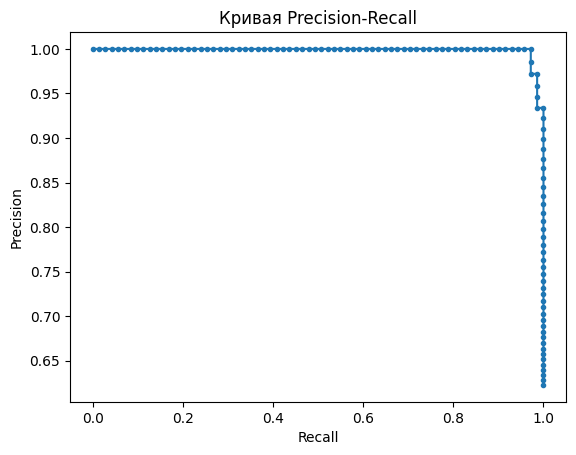

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]
[8.78417737e-01 3.04735433e-08 1.59969809e-03 9.98775726e-01
 9.99858607e-01 2.00253498e-10 6.15347950e-11 1.92820681e-02
 9.84264981e-01 9.94311003e-01 9.29270359e-01 8.09446888e-04
 9.88907827e-01 1.76075741e-01 9.99212570e-01 1.74968272e-03
 9.98803857e-01 9.99987939e-01 9.99999387e-01 7.22142596e-07
 8.27778678e-01 9.92295256e-01 6.21088494e-09 9.99662491e-01
 9.96530414e-01 9.99758501e-01 9.98974884e-01 9.98978180e-01
 9.95311622e-01 7.41846222e-09 9.98535358e-01 9.99762181e-01
 9.99107461e-01 9.86395780e-01 9.99883544e-01 9.99050996e-01
 2.07437025e-03 9.98986277e-01 1.00852442e-05 7.18898594e-01
 9.99782212e-01 6.22986310e-04 9.99539044e-01 9.96009202e-01
 9.99756991e-01 9.82900274e-01 9.99967920e-01 9.99522850e-01
 9.59469632e-01 9.98578390e-01 9.47

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, classification_report, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)

# Обучаем модель на обучающих данных
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1] # для каждого значения дает вереоятность

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')

# Рассчитайте кривую Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
# Построить график кривой Precision-Recall
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.show()

thresholds
print(y_pred)
print(y_scores)

Cross-Validation Results (Accuracy): [0.98909091 0.98909091 0.98175182 1.         0.98905109]
Mean Accuracy: 0.9897969475779694


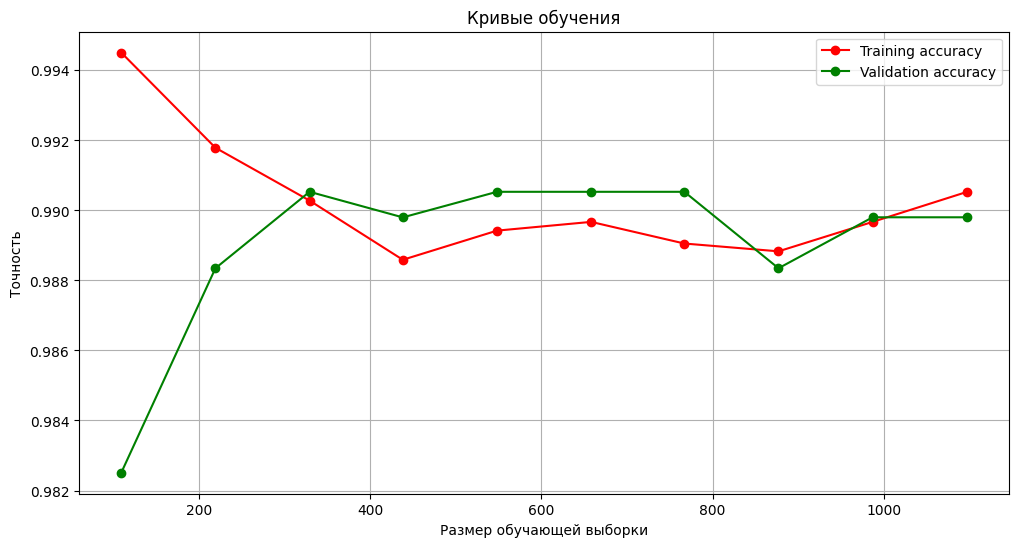

In [20]:
import pandas as pd
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import learning_curve, train_test_split

columns = ['variance', 'skewness', 'kurtosis', 'entropy', 'target']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
data = pd.read_csv(url, header=None, names=columns)

X = data[['variance', 'skewness', 'kurtosis', 'entropy']]
y = data['target']

model = LogisticRegression(max_iter=5000)
cross_val_results = cross_val_score(model, X, y, cv=5)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

def plot_learning_curves(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y,
        train_sizes=train_sizes,
        cv=cv,
        scoring='accuracy',
        shuffle=True,  
        random_state=42,
        error_score='raise' 
    )

    train_scores_mean = train_scores.mean(axis=1)
    validation_scores_mean = validation_scores.mean(axis=1)

    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training accuracy')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation accuracy')
    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('Точность')
    plt.title('Кривые обучения')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curves(model, X, y)